In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Question 1.
Consider the following color image in PNG format (four-channel image). Write a program that sets the transparency of the smallest and darkest rectangle shown in the middle of the image to ZERO. In the output image, the central rectangle will not appear while the rest will be the same. You cannot use OpenCV for this task.

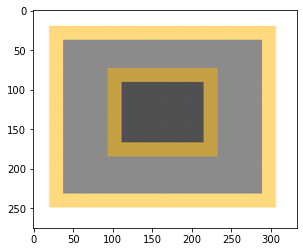

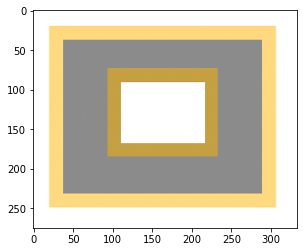

In [2]:

def set_transparency(image, transparency_value):
    # Get the shape of the image
    rows, cols,channels = image.shape


    # Define the smallest and darkest rectangle
    
    start_row = int(rows / 3)
    
    end_row = int(3 * rows / 4.9)
    
    start_col = int(cols / 3)
    
    end_col = int(3 * cols / 4.6)


    # Set the transparency of the smallest and darkest rectangle
    for row in range(start_row, end_row):
        for col in range(start_col, end_col):
            for channel in range(channels):
                image[row][col][channel] = transparency_value
    
    return image


image  = Image.open("test.png") 
image_np = np.array(image)

# Display the image
plt.imshow(image_np)
plt.show()

transparent_image = set_transparency(image_np, 255)

pil_image = Image.fromarray(transparent_image)

# Display the image
plt.imshow(transparent_image)
plt.show()

# Save the image to a file
pil_image.save("output.png")




In [3]:
#another way 

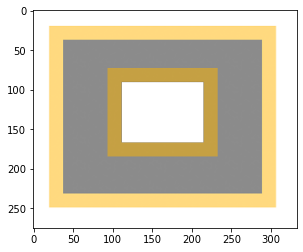

In [4]:
# Load the image
im = Image.open("test.png")

# Convert the image to grayscale
gray = im.convert("L")

# Set the intensity threshold
threshold = 85

# Get the pixels in the grayscale image
pixels = list(gray.getdata())
pixels = [pixels[i * gray.width:(i + 1) * gray.width] for i in range(gray.height)]

# Create a new image with the same size as the original image
output_im = Image.new("RGBA", (im.width, im.height))

# Get the pixels in the new image
output_pixels = output_im.load()

# Iterate over the pixels in the grayscale image
for i in range(gray.height):
    for j in range(gray.width):
        # If the pixel intensity is below the threshold
        if pixels[i][j] < threshold:
            # Set the RGBA values for the pixel in the channel
            output_pixels[j, i] = (im.getpixel((j, i))[0], im.getpixel((j, i))[1], im.getpixel((j, i))[2], 0)
        else:
            # Set the RGBA values for the pixel 
            output_pixels[j, i] = im.getpixel((j, i))





# Display result 
plt.imshow(output_im)
plt.show()

# Save  image
output_im.save("output_image.png")


# Question 2.
Create a function ConvertToGray(img). It takes an image as input. If the input image is color, then
convert it into grayscale. Return the converted image. Use the following formula to convert a color
image to grayscale. Display both grayscale and color images. You cannot use OpenCV for this task.
imgGray = 0.299R + 0.587G + 0.114B
Here R, G and B represent red, Green and blue channels respectively.

In [11]:
def ConvertToGray(img):
    if len(img.shape) > 2:
        img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
    return Image.fromarray(np.uint8(img))

# read image
color_img = np.array(Image.open("test.png"))
# Convert to grayscale
gray_img = ConvertToGray(color_img)
gray_img.show()

gray_img.save("Greyoutput_image.png")

In [12]:
grey_img = np.array(Image.open("Greyoutput_image.png"))

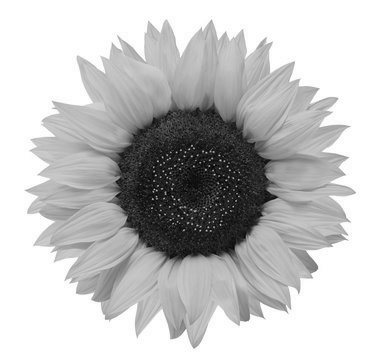

In [8]:
from IPython.display import Image
Image(filename='Greyoutput_image.png')

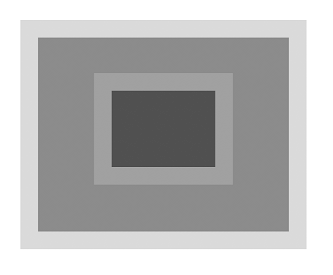

In [13]:
from IPython.display import Image
Image(filename='Greyoutput_image2.png')

# Question 3.
Create a function called StackHorizontal(img1,img2) that concatenates two images and returns the
result. The function must check that both img1 and img2 have same size and channels. It should
display error if size is not same. Display the obtained result. You cannot use OpenCV for this task.
Hint: Create a larger 2D array that can hold both images and then copy the pixels one by one from the
source images.

In [5]:
from PIL import Image
def StackHorizontal(img1, img2):
    width, height = img1.size
    channels = len(img1.mode)
    if img2.size[0] != width or img2.size[1] != height or len(img2.mode) != channels:
        raise Exception("Error: Both images must have the same size and channels")
    
    # array will be used to store the result of concatenating two images horizontally
    result = np.zeros((height, width*2, channels), dtype=np.uint8)
    # sets the values in the left half 
    result[:, :width, :] = np.array(img1)
    # sets the values in the right half 
    result[:, width:, :] = np.array(img2)
    
    return result

img1 = Image.open("rect1.jpg")
img2 = Image.open("rect7.jpg")
result = StackHorizontal(img1, img2)
Image.fromarray(result).show()

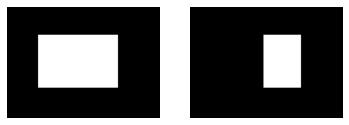

In [25]:
# Two Images Display
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')

plt.show()

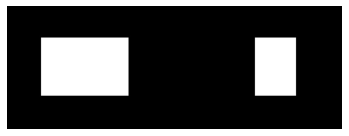

In [40]:
# Result Display the image
plt.imshow(result)
plt.axis('off')
plt.show()

# Question 4.
Write a function called FlipImg(img, flag). Img is the input image while flag can be 0 or 1. If the flag
is 0 flip the image horizontally and when flag is 1 then flip vertically. Default flag should be 0. Return
the flipped image and display both the original and flipped images. You cannot use OpenCV for this
task.

In [11]:

def FlipImg(img, flag=0):
    # np.array function converts img1 into a numpy array,for fast and numerical operations     
    img = np.array(img)
    # array filled with zeros, with the same shape and data type as the img array
    flipped_img = np.zeros_like(img)
    # horizontal flip
    if flag == 0:
        # each pixel in the image, the code computes the corresponding pixel
        # rightmost column in the input image will become the leftmost column in the flipped image and vice versa
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                flipped_img[i, j] = img[i, img.shape[1] - 1 - j]
    # vertical flip
    elif flag == 1:
        #  bottom-most row in the input image will become the top-most row in the flipped image and vice versa
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                flipped_img[i, j] = img[img.shape[0] - 1 - i, j]
    else:
        raise ValueError("flag must be 0 or 1")
    return flipped_img

# read image
img = Image.open("A1.jpg")
# call function flip image
flipped_img = FlipImg(img, flag=1)
# Image.fromarray(np.array(img)).show()
# show flip image
# Image.fromarray(flipped_img).show()


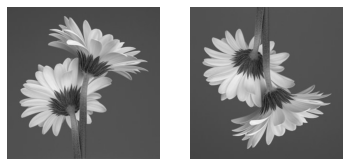

In [12]:
# Result Display the image flip=1
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(flipped_img)
plt.axis('off')

plt.show()

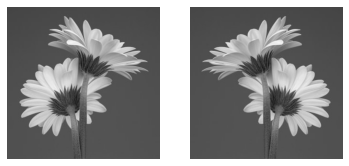

In [31]:
# Result Display the image flip=0
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(flipped_img)
plt.axis('off')

plt.show()

# Question 5.
Consider the following two grayscale images. These have same dimensions. Write a function that
CommonImg(img1, img2) that finds the common area between two image and displays the result. If
no common area is found then it must display a black image otherwise, it will show the common area.
You cannot use OpenCV for this task.

In [8]:
import numpy as np
from PIL import Image

def CommonImg(img1, img2):
    width, height = img1.size
    
    if img2.size[0] != width or img2.size[1] != height :
        raise Exception("Error: Both images must have the same size and channels")
    # np.array function converts this img1 and img2 into a numpy array,for fast and numerical operations     
    img1_array = np.array(img1)
    img2_array = np.array(img2)
    #  numpy array filled with zeros with the same shape as img1 and data type np.uint8
    common_img = np.zeros(img1_array.shape, dtype=np.uint8)
    #common_img[np.where((img1_array == img2_array) & (img1_array != 0))] = 255
    
    # Loops over the rows and columns of both img1_array and img2_array. 
    # If the pixel in both arrays are equal and not equal to 0, then pixel in common_img array is set to 255.
    for i in range(img1_array.shape[0]):
        for j in range(img1_array.shape[1]):
            if (img1_array[i, j] == img2_array[i, j]) and (img1_array[i, j] != 0):
                common_img[i, j] = 255
    return common_img

# read image
img1 = Image.open("P1.png").convert('L')
img2 = Image.open("P2.png").convert('L')
# call function find 
common_img = CommonImg(img1, img2)
# result show
Image.fromarray(common_img).show()


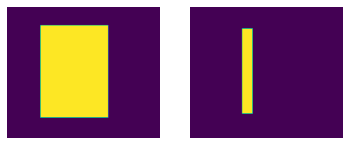

In [9]:
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')

plt.show()

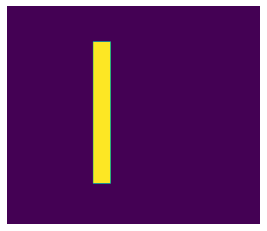

In [10]:
# Result Display the image
plt.imshow(common_img)
plt.axis('off')
plt.show()